In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelcolor'] = 'green'

In [4]:
df = pd.read_csv('C:/Users/RAVI/TensorFlow_FILES/TensorFlow_FILES/DATA/cancer_classification.csv')

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [11]:
df.benign_0__mal_1.value_counts()/len(df)

1    0.627417
0    0.372583
Name: benign_0__mal_1, dtype: float64

In [21]:
sns.set_style("whitegrid")

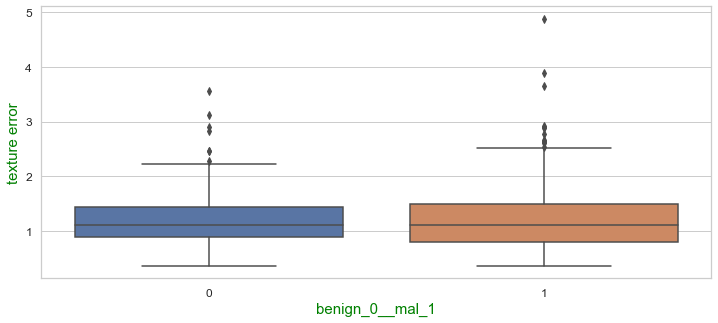

In [24]:
sns.boxplot(x=df.benign_0__mal_1, y=df['texture error'])

In [25]:
df.shape

(569, 31)

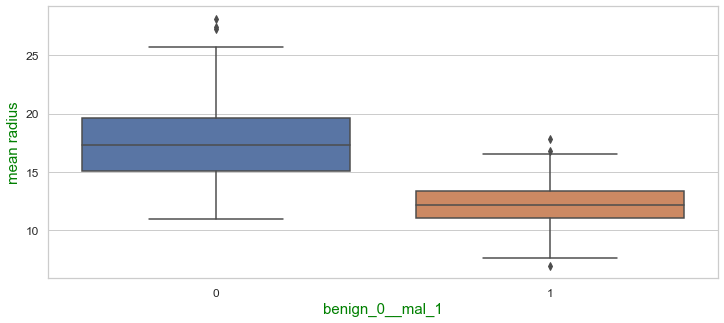

In [26]:
sns.boxplot(x=df.benign_0__mal_1, y=df['mean radius'])

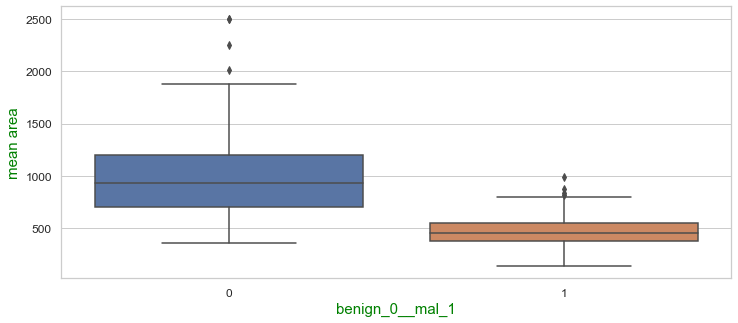

In [27]:
sns.boxplot(x=df.benign_0__mal_1, y=df['mean area'])

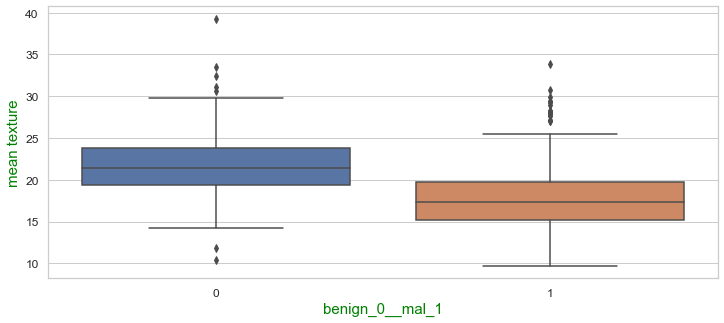

In [28]:
sns.boxplot(x=df.benign_0__mal_1, y=df['mean texture'])

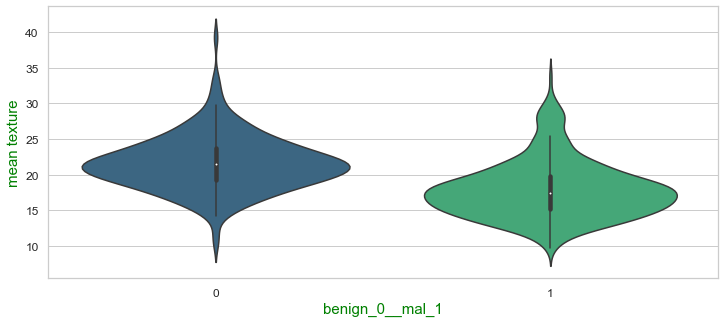

In [30]:
sns.violinplot(x=df.benign_0__mal_1, y=df['mean texture'], palette='viridis')

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [43]:
import tensorflow as tf

In [31]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

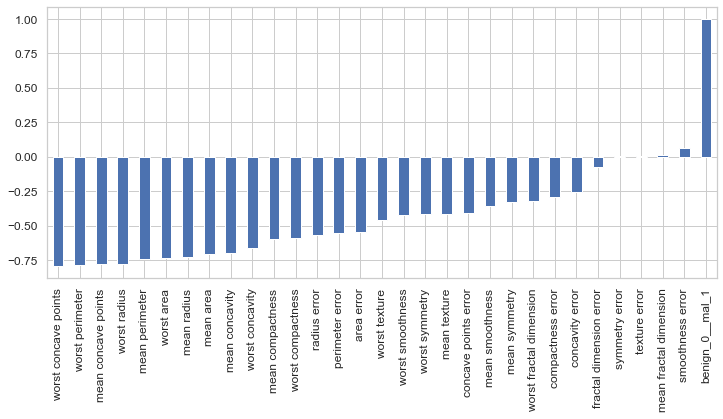

In [35]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [36]:
X = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
scaler = MinMaxScaler()

In [41]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# model preparation
model = Sequential()

model.add(Dense(45, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(40, activation='relu'))
model.add(Dropout(0.55))

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [45]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
13/13 [==============================] - 2s 26ms/step - loss: 0.7237 - val_loss: 0.6849
Epoch 2/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6917 - val_loss: 0.6775
Epoch 3/600
13/13 [==============================] - 0s 7ms/step - loss: 0.6908 - val_loss: 0.6709
Epoch 4/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6732 - val_loss: 0.6664
Epoch 5/600
13/13 [==============================] - 0s 7ms/step - loss: 0.6755 - val_loss: 0.6598
Epoch 6/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6542 - val_loss: 0.6495
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6543 - val_loss: 0.6384
Epoch 8/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6518 - val_loss: 0.6263
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6307 - val_loss: 0.6057
Epoch 10/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6474 - val_loss: 0.5862
Epoch 11

13/13 [==============================] - 0s 6ms/step - loss: 0.1059 - val_loss: 0.0471
Epoch 84/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1269 - val_loss: 0.0489
Epoch 85/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1237 - val_loss: 0.0871
Epoch 86/600
13/13 [==============================] - 0s 8ms/step - loss: 0.1233 - val_loss: 0.0426
Epoch 87/600
13/13 [==============================] - 0s 7ms/step - loss: 0.1140 - val_loss: 0.0451
Epoch 88/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1255 - val_loss: 0.0805
Epoch 89/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0996 - val_loss: 0.0534
Epoch 90/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1046 - val_loss: 0.0429
Epoch 91/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1229 - val_loss: 0.0434
Epoch 92/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0980 - val_loss: 0.0447
Epoch 93/600


13/13 [==============================] - 0s 6ms/step - loss: 0.0940 - val_loss: 0.0364
Epoch 165/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0874 - val_loss: 0.0488
Epoch 166/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0890 - val_loss: 0.0484
Epoch 167/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0630 - val_loss: 0.0534
Epoch 168/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0873 - val_loss: 0.0393
Epoch 169/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0662 - val_loss: 0.0411
Epoch 170/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0416 - val_loss: 0.0427
Epoch 171/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0785 - val_loss: 0.0487
Epoch 172/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0778 - val_loss: 0.0443
Epoch 173/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0626 - val_loss: 0.0454
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.0585 - val_loss: 0.0406
Epoch 246/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0618 - val_loss: 0.0446
Epoch 247/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0495 - val_loss: 0.0394
Epoch 248/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0594 - val_loss: 0.0513
Epoch 249/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0533 - val_loss: 0.0481
Epoch 250/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0850 - val_loss: 0.0487
Epoch 251/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0411 - val_loss: 0.0469
Epoch 252/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0506 - val_loss: 0.0490
Epoch 253/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0323 - val_loss: 0.0474
Epoch 254/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0469 - val_loss: 0.0477
Epoc

13/13 [==============================] - 0s 8ms/step - loss: 0.0985 - val_loss: 0.0597
Epoch 327/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0685 - val_loss: 0.0522
Epoch 328/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0521 - val_loss: 0.0500
Epoch 329/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0698 - val_loss: 0.0625
Epoch 330/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0547 - val_loss: 0.0633
Epoch 331/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0423 - val_loss: 0.0441
Epoch 332/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0538 - val_loss: 0.0424
Epoch 333/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0369 - val_loss: 0.0759
Epoch 334/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0738 - val_loss: 0.0542
Epoch 335/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0436 - val_loss: 0.0483
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.0218 - val_loss: 0.0652
Epoch 408/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0677 - val_loss: 0.0669
Epoch 409/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0702 - val_loss: 0.0758
Epoch 410/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0391 - val_loss: 0.0622
Epoch 411/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0426 - val_loss: 0.0604
Epoch 412/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0313 - val_loss: 0.0640
Epoch 413/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0550 - val_loss: 0.0720
Epoch 414/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0349 - val_loss: 0.0660
Epoch 415/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0262 - val_loss: 0.0818
Epoch 416/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0438 - val_loss: 0.0738
Epoc

13/13 [==============================] - 0s 7ms/step - loss: 0.0132 - val_loss: 0.0773
Epoch 489/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0592 - val_loss: 0.0764
Epoch 490/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0465 - val_loss: 0.0696
Epoch 491/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0492 - val_loss: 0.0716
Epoch 492/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0486 - val_loss: 0.0675
Epoch 493/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0358 - val_loss: 0.0711
Epoch 494/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0087 - val_loss: 0.0733
Epoch 495/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0133 - val_loss: 0.0841
Epoch 496/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.0872
Epoch 497/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0141 - val_loss: 0.0808
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.0416 - val_loss: 0.0610
Epoch 570/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0315 - val_loss: 0.0638
Epoch 571/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0285 - val_loss: 0.0840
Epoch 572/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0308 - val_loss: 0.0725
Epoch 573/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0251 - val_loss: 0.0550
Epoch 574/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0230 - val_loss: 0.0538
Epoch 575/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0343 - val_loss: 0.0537
Epoch 576/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0287 - val_loss: 0.0550
Epoch 577/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0413 - val_loss: 0.0613
Epoch 578/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0141 - val_loss: 0.0769
Epoc

In [46]:
model_loss = pd.DataFrame(model.history.history)

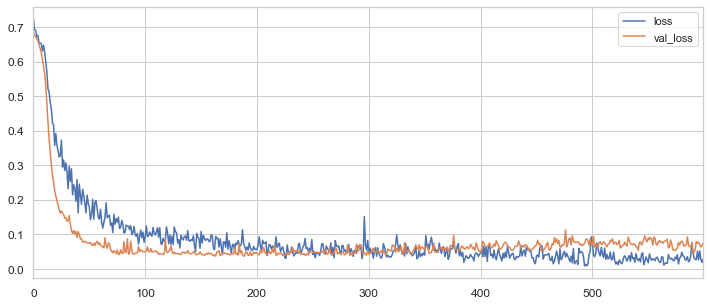

In [47]:
model_loss.plot()

In [50]:
test_prediction = model.predict(X_test)

In [49]:
train_prediction = model.predict(X_train)

In [51]:
from sklearn.metrics import classification_report

In [56]:
test_prediction = test_prediction.astype(int).reshape(-1,)
train_prediction = train_prediction.astype(int).reshape(-1,)

# Classification report

### Training data

In [57]:
print(classification_report(y_train, train_prediction))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       149
           1       1.00      0.66      0.80       249

    accuracy                           0.79       398
   macro avg       0.82      0.83      0.79       398
weighted avg       0.87      0.79      0.79       398



### Test data 

In [58]:
print(classification_report(y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        63
           1       1.00      0.66      0.79       108

    accuracy                           0.78       171
   macro avg       0.81      0.83      0.78       171
weighted avg       0.86      0.78      0.79       171



In [64]:
# model 2
model = Sequential()

# Adding layers
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

#compiling model
model.compile(optimizer='adam', loss='binary_crossentropy')

In [65]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
13/13 [==============================] - 1s 16ms/step - loss: 0.7148 - val_loss: 0.6940
Epoch 2/600
13/13 [==============================] - 0s 6ms/step - loss: 0.7000 - val_loss: 0.6769
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6801 - val_loss: 0.6600
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6680 - val_loss: 0.6391
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6516 - val_loss: 0.6211
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6290 - val_loss: 0.6007
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6230 - val_loss: 0.5758
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6026 - val_loss: 0.5543
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5756 - val_loss: 0.5310
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5714 - val_loss: 0.5074
Epoch 11

13/13 [==============================] - 0s 4ms/step - loss: 0.1630 - val_loss: 0.0678
Epoch 83/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1564 - val_loss: 0.0659
Epoch 84/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1292 - val_loss: 0.0651
Epoch 85/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1183 - val_loss: 0.0649
Epoch 86/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1430 - val_loss: 0.0636
Epoch 87/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1549 - val_loss: 0.0651
Epoch 88/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1308 - val_loss: 0.0666
Epoch 89/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1349 - val_loss: 0.0661
Epoch 90/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1385 - val_loss: 0.0646
Epoch 91/600
13/13 [==============================] - 0s 9ms/step - loss: 0.1227 - val_loss: 0.0623
Epoch 92/600


13/13 [==============================] - 0s 5ms/step - loss: 0.0969 - val_loss: 0.0496
Epoch 164/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0988 - val_loss: 0.0489
Epoch 165/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1107 - val_loss: 0.0504
Epoch 166/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0959 - val_loss: 0.0495
Epoch 167/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0903 - val_loss: 0.0534
Epoch 168/600
13/13 [==============================] - 0s 6ms/step - loss: 0.1025 - val_loss: 0.0487
Epoch 169/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0985 - val_loss: 0.0507
Epoch 170/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0981 - val_loss: 0.0482
Epoch 171/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0917 - val_loss: 0.0514
Epoch 172/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0751 - val_loss: 0.0525
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.0823 - val_loss: 0.0466
Epoch 245/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0645 - val_loss: 0.0452
Epoch 246/600
13/13 [==============================] - 0s 5ms/step - loss: 0.1078 - val_loss: 0.0429
Epoch 247/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0719 - val_loss: 0.0451
Epoch 248/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0777 - val_loss: 0.0427
Epoch 249/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0759 - val_loss: 0.0418
Epoch 250/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0689 - val_loss: 0.0437
Epoch 251/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0642 - val_loss: 0.0442
Epoch 252/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0778 - val_loss: 0.0473
Epoch 253/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0571 - val_loss: 0.0443
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.0742 - val_loss: 0.0501
Epoch 326/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0628 - val_loss: 0.0499
Epoch 327/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0852 - val_loss: 0.0509
Epoch 328/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0497 - val_loss: 0.0519
Epoch 329/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0552 - val_loss: 0.0507
Epoch 330/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0556 - val_loss: 0.0476
Epoch 331/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0653 - val_loss: 0.0515
Epoch 332/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0523 - val_loss: 0.0522
Epoch 333/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0647 - val_loss: 0.0512
Epoch 334/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0527 - val_loss: 0.0571
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.0728 - val_loss: 0.0509
Epoch 407/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0436 - val_loss: 0.0529
Epoch 408/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0570 - val_loss: 0.0430
Epoch 409/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0417 - val_loss: 0.0476
Epoch 410/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0505 - val_loss: 0.0624
Epoch 411/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0422 - val_loss: 0.0555
Epoch 412/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0641 - val_loss: 0.0531
Epoch 413/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0440 - val_loss: 0.0540
Epoch 414/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0460 - val_loss: 0.0533
Epoch 415/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0416 - val_loss: 0.0517
Epoc

13/13 [==============================] - 0s 6ms/step - loss: 0.0465 - val_loss: 0.0563
Epoch 488/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0523 - val_loss: 0.0579
Epoch 489/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0487 - val_loss: 0.0498
Epoch 490/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0483 - val_loss: 0.0613
Epoch 491/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0369 - val_loss: 0.0575
Epoch 492/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.0533
Epoch 493/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0466 - val_loss: 0.0542
Epoch 494/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0580 - val_loss: 0.0486
Epoch 495/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0576 - val_loss: 0.0474
Epoch 496/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0448 - val_loss: 0.0516
Epoc

13/13 [==============================] - 0s 5ms/step - loss: 0.0422 - val_loss: 0.0582
Epoch 569/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0358 - val_loss: 0.0714
Epoch 570/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0433 - val_loss: 0.0632
Epoch 571/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0422 - val_loss: 0.0573
Epoch 572/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0294 - val_loss: 0.0547
Epoch 573/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0383 - val_loss: 0.0575
Epoch 574/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0453 - val_loss: 0.0617
Epoch 575/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0435 - val_loss: 0.0618
Epoch 576/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0342 - val_loss: 0.0652
Epoch 577/600
13/13 [==============================] - 0s 6ms/step - loss: 0.0533 - val_loss: 0.0597
Epoc

In [66]:
model_loss = pd.DataFrame(model.history.history)

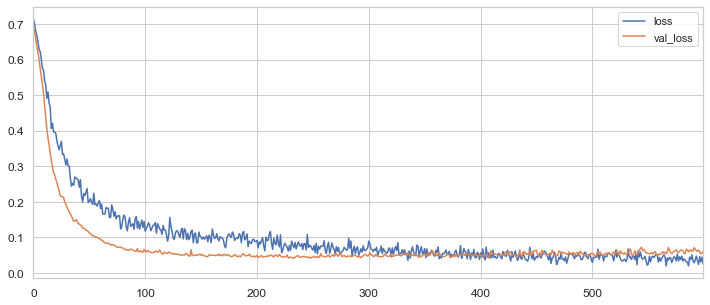

In [67]:
model_loss.plot()

In [70]:
train_prediction = model.predict_classes(X_train)
test_prediction = model.predict_classes(X_test)

print("-----------------------classification_report: training data set -------------")
print(classification_report(y_train, train_prediction))
print("-----------------------classification_report: test data set -------------")
print(classification_report(y_test, test_prediction))

C:\Users\RAVI\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\RAVI\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if i

-----------------------classification_report: training data set -------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       249

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

-----------------------classification_report: test data set -------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

